In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/investigation_train_large_checked.csv')

# Create age bins and analyze check rates
df['age_group'] = pd.cut(df['persoon_leeftijd_bij_onderzoek'], 
                       bins=[0, 25, 35, 45, 55, 100], 
                       labels=['<25', '25-35', '35-45', '45-55', '55+'])

age_rates = df.groupby('age_group')['checked'].agg(['mean', 'count']).reset_index()
age_rates['check_rate'] = age_rates['mean'] * 100

print(age_rates.sort_values('check_rate', ascending=False))

  age_group      mean  count  check_rate
0       <25  0.439487   1950   43.948718
1     25-35  0.352001  11446   35.200070
2     35-45  0.203382  31109   20.338166
3     45-55  0.097117  46233    9.711678
4       55+  0.096811  39262    9.681117


C:\Users\Daniel\AppData\Local\Temp\ipykernel_22192\3042609476.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rates = df.groupby('age_group')['checked'].agg(['mean', 'count']).reset_index()


Young people are significantly more likely to be checked, with those under 25 having the highest check rate of 44%, which steadily decreases with age to less than 10% for those over 45.

<Figure size 1000x600 with 0 Axes>

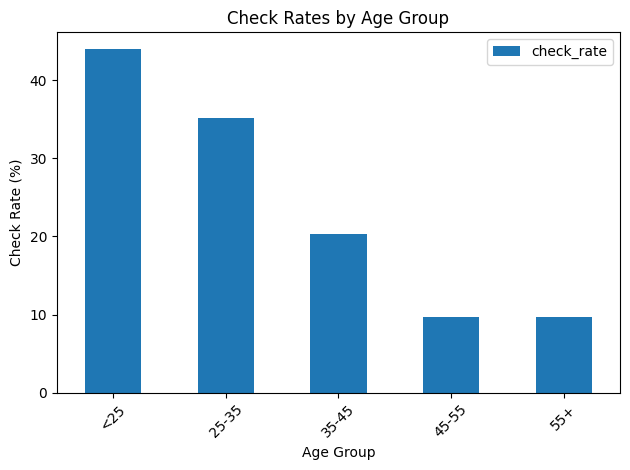

In [3]:
plt.figure(figsize=(10, 6))
age_rates.plot(kind='bar', x='age_group', y='check_rate')
plt.title('Check Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Check Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()